**Initialization + Reading data**

In [291]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("gdrive/My Drive/test regression/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**Data Analysis**

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [294]:
for col in data.columns:
  print(col)
  print(data[col].unique())
  print(data[col].value_counts())
  print()

school
['GP' 'MS']
school
GP    349
MS     46
Name: count, dtype: int64

sex
['F' 'M']
sex
F    208
M    187
Name: count, dtype: int64

age
[18 17 15 16 19 22 20 21]
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

address
['U' 'R']
address
U    307
R     88
Name: count, dtype: int64

famsize
['GT3' 'LE3']
famsize
GT3    281
LE3    114
Name: count, dtype: int64

Pstatus
['A' 'T']
Pstatus
T    354
A     41
Name: count, dtype: int64

Medu
[4 1 3 2 0]
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

Fedu
[4 1 2 3 0]
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64

Mjob
['at_home' 'health' 'other' 'services' 'teacher']
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

Fjob
['teacher' 'other' 'services' 'health' 'at_home']
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: c

<Axes: >

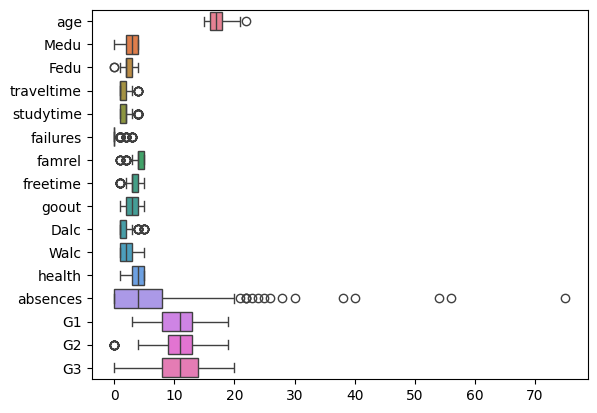

In [295]:
sns.boxplot(data = data, orient = 'h')

**Outlier Removal**

<Axes: >

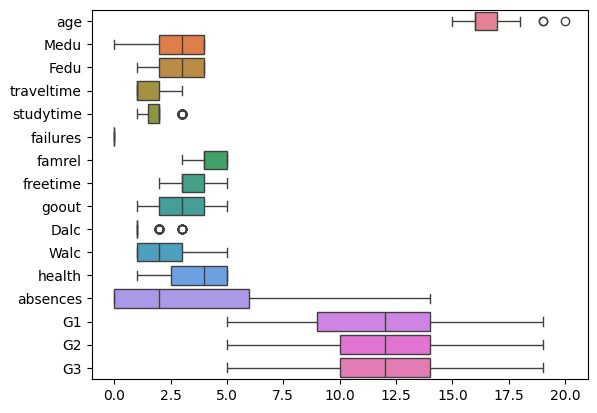

In [296]:
def removeOutlier(col, data):
  Q3 = data[col].quantile(0.75)
  Q1 = data[col].quantile(0.25)
  IQR = Q3 - Q1
  outliers = (data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))
  return data[~outliers]

for col in data.select_dtypes(np.number).columns:
  data = removeOutlier(col, data)

sns.boxplot(data = data, orient = 'h')

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      219 non-null    object
 1   sex         219 non-null    object
 2   age         219 non-null    int64 
 3   address     219 non-null    object
 4   famsize     219 non-null    object
 5   Pstatus     219 non-null    object
 6   Medu        219 non-null    int64 
 7   Fedu        219 non-null    int64 
 8   Mjob        219 non-null    object
 9   Fjob        219 non-null    object
 10  reason      219 non-null    object
 11  guardian    219 non-null    object
 12  traveltime  219 non-null    int64 
 13  studytime   219 non-null    int64 
 14  failures    219 non-null    int64 
 15  schoolsup   219 non-null    object
 16  famsup      219 non-null    object
 17  paid        219 non-null    object
 18  activities  219 non-null    object
 19  nursery     219 non-null    object
 20  higher      219

**Data Encoding**

In [298]:
toYes = ""
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school', 'sex', 'address', 'famsize', 'Pstatus']:
  print(data[col].value_counts())

schoolsup
no     191
yes     28
Name: count, dtype: int64
famsup
yes    138
no      81
Name: count, dtype: int64
paid
yes    110
no     109
Name: count, dtype: int64
activities
yes    118
no     101
Name: count, dtype: int64
nursery
yes    177
no      42
Name: count, dtype: int64
higher
yes    216
no       3
Name: count, dtype: int64
internet
yes    185
no      34
Name: count, dtype: int64
romantic
no     158
yes     61
Name: count, dtype: int64
school
GP    194
MS     25
Name: count, dtype: int64
sex
F    113
M    106
Name: count, dtype: int64
address
U    177
R     42
Name: count, dtype: int64
famsize
GT3    158
LE3     61
Name: count, dtype: int64
Pstatus
T    198
A     21
Name: count, dtype: int64


In [299]:
def YNtoBinary(term):
  if term == 'yes':
    return 1
  else:
    return 0

def OthertoBinary(term):
  global toYes
  if toYes == "":
    toYes = term
    return 1
  elif term == toYes:
    return 1
  else:
    return 0

for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
  data[col] = data[col].apply(YNtoBinary)
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus']:
  toYes = ""
  data[col] = data[col].apply(OthertoBinary)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,0,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,1,1,15,1,1,0,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,0,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,1,0,16,1,0,0,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


In [300]:
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school', 'sex', 'address', 'famsize', 'Pstatus']:
  print(data[col].value_counts())

schoolsup
0    191
1     28
Name: count, dtype: int64
famsup
1    138
0     81
Name: count, dtype: int64
paid
1    110
0    109
Name: count, dtype: int64
activities
1    118
0    101
Name: count, dtype: int64
nursery
1    177
0     42
Name: count, dtype: int64
higher
1    216
0      3
Name: count, dtype: int64
internet
1    185
0     34
Name: count, dtype: int64
romantic
0    158
1     61
Name: count, dtype: int64
school
1    194
0     25
Name: count, dtype: int64
sex
1    113
0    106
Name: count, dtype: int64
address
1    177
0     42
Name: count, dtype: int64
famsize
1    158
0     61
Name: count, dtype: int64
Pstatus
0    198
1     21
Name: count, dtype: int64


In [301]:
data = pd.get_dummies(data, columns=['Mjob', 'Fjob', 'reason', 'guardian'])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,1,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,1,1,17,1,1,0,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
3,1,1,15,1,1,0,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,1,1,16,1,1,0,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False
5,1,0,16,1,0,0,4,3,1,2,...,True,False,False,False,False,False,True,False,True,False


**Feature Selection**

In [302]:
# cont_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
# sns.pairplot(data[cont_vars])
# plt.show()

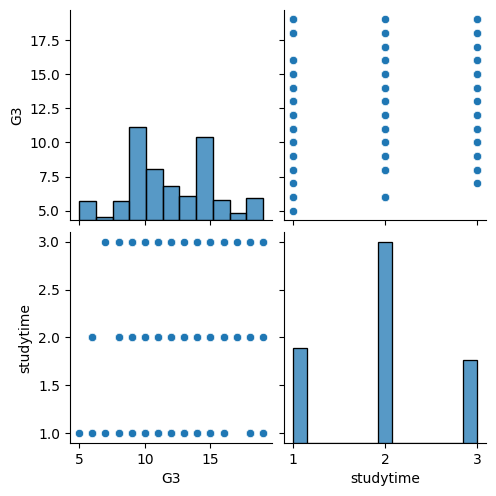

In [303]:
cont_vars = ['G3', 'studytime']
sns.pairplot(data[cont_vars])
plt.show()
cont_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

In [304]:
# data.drop(['G1', 'G2'], axis = 1, inplace = True)

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             219 non-null    int64
 1   sex                219 non-null    int64
 2   age                219 non-null    int64
 3   address            219 non-null    int64
 4   famsize            219 non-null    int64
 5   Pstatus            219 non-null    int64
 6   Medu               219 non-null    int64
 7   Fedu               219 non-null    int64
 8   traveltime         219 non-null    int64
 9   studytime          219 non-null    int64
 10  failures           219 non-null    int64
 11  schoolsup          219 non-null    int64
 12  famsup             219 non-null    int64
 13  paid               219 non-null    int64
 14  activities         219 non-null    int64
 15  nursery            219 non-null    int64
 16  higher             219 non-null    int64
 17  internet           21

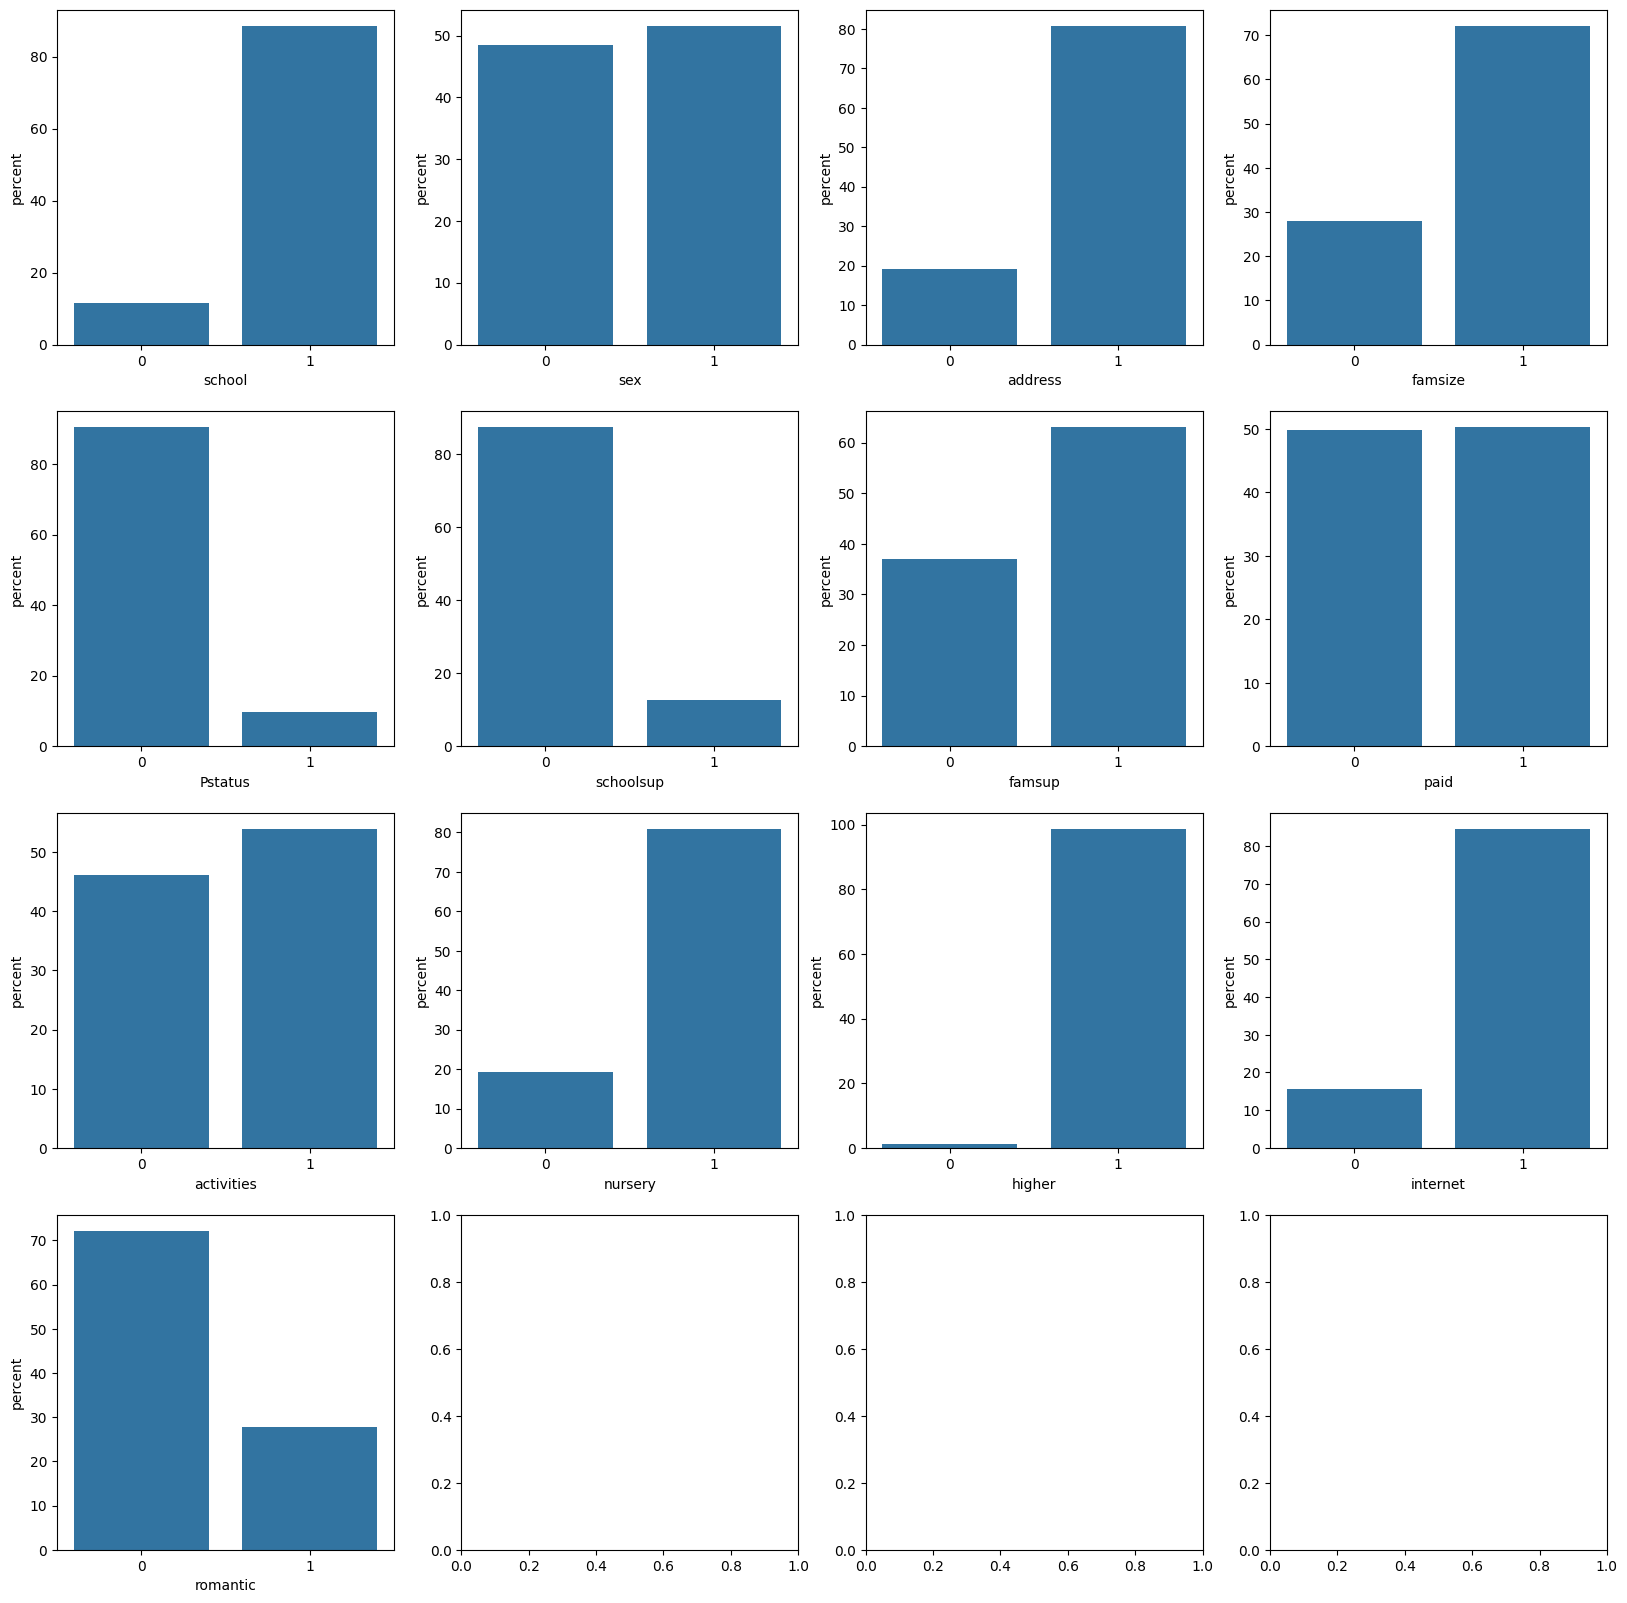

In [306]:
cat_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 20))
for i, var in enumerate(cat_vars):
  sns.countplot(x = var, data = data, ax = ax[i // 4, i % 4], stat = 'percent')
plt.show()

In [307]:
# data.drop(['higher'], axis = 1, inplace = True)

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             219 non-null    int64
 1   sex                219 non-null    int64
 2   age                219 non-null    int64
 3   address            219 non-null    int64
 4   famsize            219 non-null    int64
 5   Pstatus            219 non-null    int64
 6   Medu               219 non-null    int64
 7   Fedu               219 non-null    int64
 8   traveltime         219 non-null    int64
 9   studytime          219 non-null    int64
 10  failures           219 non-null    int64
 11  schoolsup          219 non-null    int64
 12  famsup             219 non-null    int64
 13  paid               219 non-null    int64
 14  activities         219 non-null    int64
 15  nursery            219 non-null    int64
 16  higher             219 non-null    int64
 17  internet           21

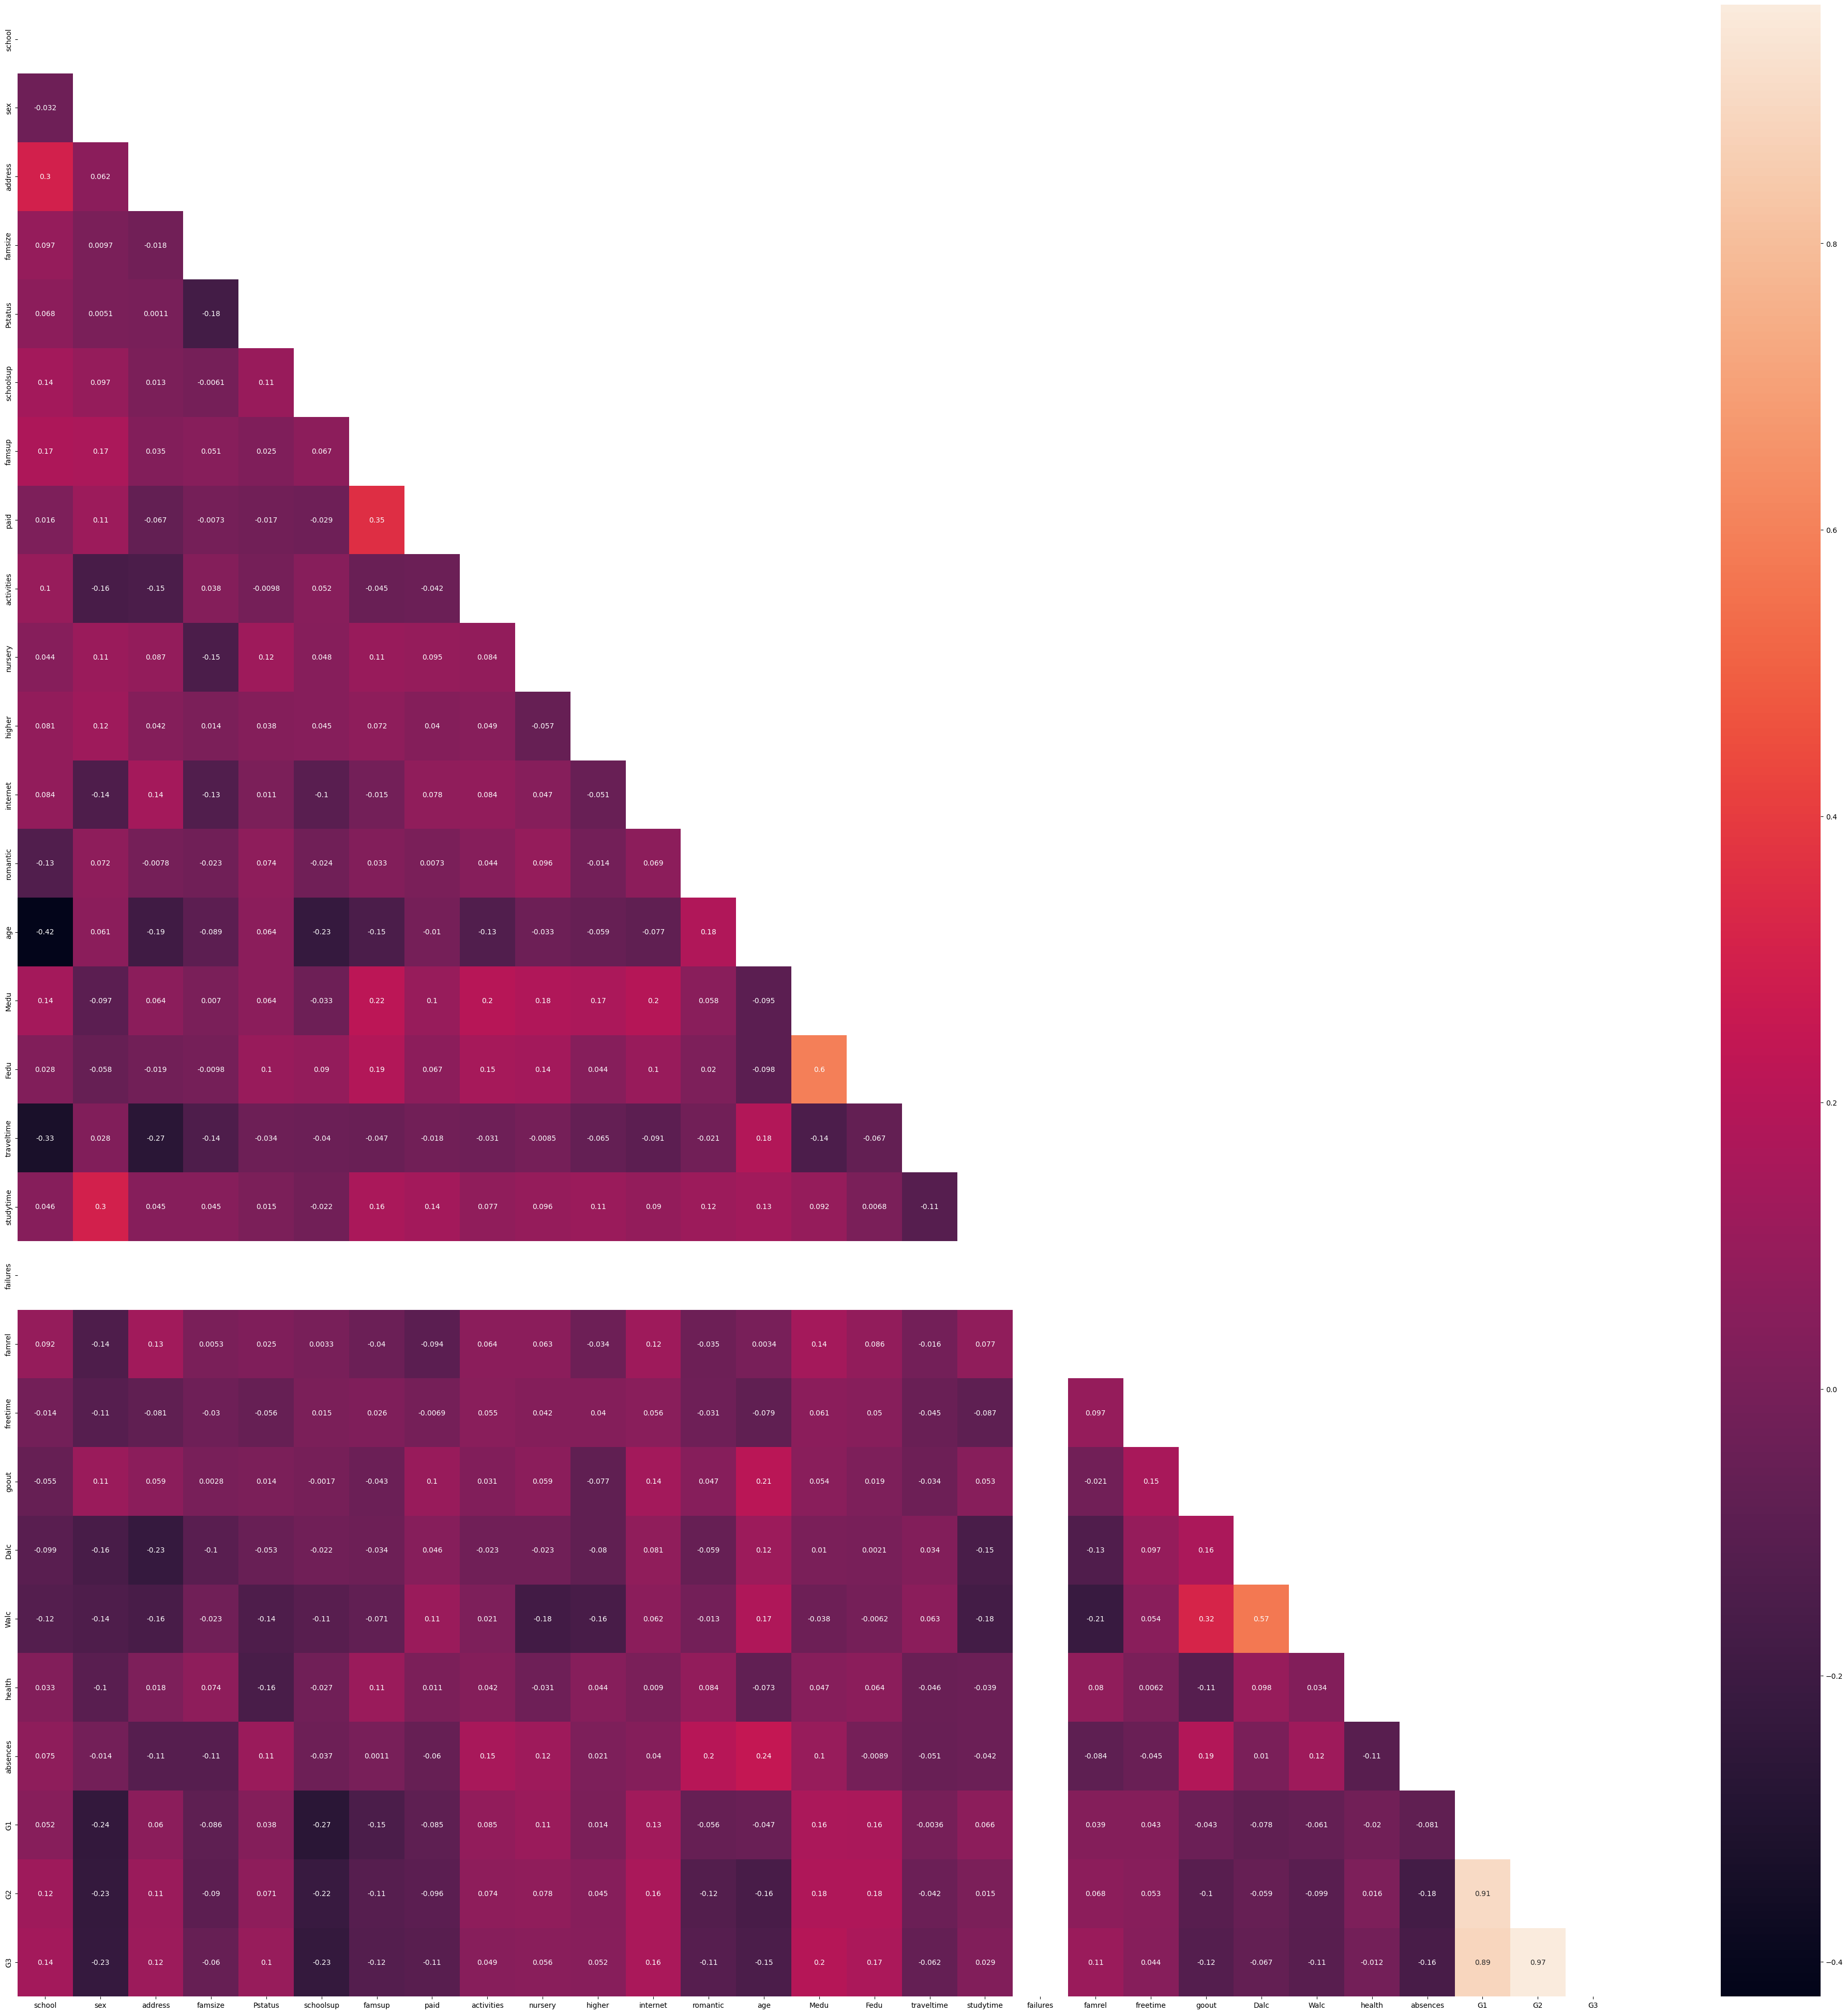

In [311]:
all_corr_cols = cat_vars + cont_vars
corr = data[all_corr_cols].corr()
mask = np.zeros_like(corr, dtype = 'bool')
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (50, 50))
sns.heatmap(corr, annot = True, mask = mask)
plt.show()

In [315]:
all_corr_cols = data.columns
all_corr_cols = all_corr_cols.drop(['G3'])
corr_list = []
for col in all_corr_cols:
  corr = data['G3'].corr(data[col])
  corr_list.append(corr)

df_corr = pd.DataFrame(data = zip(all_corr_cols, corr_list), columns = ['col_names', 'corr'])
df_corr.sort_values(by = 'corr', ascending = False)

,col_names,corr
27,G2,0.966550
26,G1,0.888397
6,Medu,0.198417
31,Mjob_services,0.187749
37,Fjob_teacher,0.181919
7,Fedu,0.165747
17,internet,0.160230
0,school,0.139056
29,Mjob_health,0.122668
3,address,0.115211


In [317]:
features = df_corr.loc[abs(df_corr['corr']) > 0.1, 'col_names'].to_list()
features, len(features)

(['school',
  'sex',
  'age',
  'address',
  'Medu',
  'Fedu',
  'schoolsup',
  'famsup',
  'paid',
  'internet',
  'romantic',
  'famrel',
  'goout',
  'Walc',
  'absences',
  'G1',
  'G2',
  'Mjob_at_home',
  'Mjob_health',
  'Mjob_other',
  'Mjob_services',
  'Fjob_other',
  'Fjob_teacher'],
 23)

**Data Selection**

In [321]:
f_data = data[features + ["G3"]].copy()
f_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 394
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   school         219 non-null    int64
 1   sex            219 non-null    int64
 2   age            219 non-null    int64
 3   address        219 non-null    int64
 4   Medu           219 non-null    int64
 5   Fedu           219 non-null    int64
 6   schoolsup      219 non-null    int64
 7   famsup         219 non-null    int64
 8   paid           219 non-null    int64
 9   internet       219 non-null    int64
 10  romantic       219 non-null    int64
 11  famrel         219 non-null    int64
 12  goout          219 non-null    int64
 13  Walc           219 non-null    int64
 14  absences       219 non-null    int64
 15  G1             219 non-null    int64
 16  G2             219 non-null    int64
 17  Mjob_at_home   219 non-null    bool 
 18  Mjob_health    219 non-null    bool 
 19  Mjob_other   

In [322]:
f_data.head()

,school,sex,age,address,Medu,Fedu,schoolsup,famsup,paid,internet,...,absences,G1,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Fjob_other,Fjob_teacher,G3
0,1,1,18,1,4,4,1,0,0,0,...,6,5,6,True,False,False,False,False,True,6
1,1,1,17,1,1,1,0,1,0,1,...,4,5,5,True,False,False,False,True,False,6
3,1,1,15,1,4,2,0,1,1,1,...,2,15,14,False,True,False,False,False,False,15
4,1,1,16,1,3,3,0,1,1,0,...,4,6,10,False,False,True,False,True,False,10
5,1,0,16,1,4,3,0,1,1,1,...,10,15,15,False,False,False,True,True,False,15


In [323]:
f_data.to_csv("gdrive/My Drive/test regression/f_data.csv")